<a href="https://colab.research.google.com/github/aboutdouglas/Processamento_Linguagem_Natural/blob/main/Redes_Neurais_Recorrentes_e_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LSTM**

Vamos utilizar uma LSTM para nosso problema de análise de sentimento. Como o texto é uma sequência de palavras, uma rede neural recorrente pode ser útil para resolver problemas relacionados a ele.

Primeiro vamos processar o texto sem utilizar Stem: 

In [57]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pós Graduação/Bases/IMDB_Dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [58]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [59]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

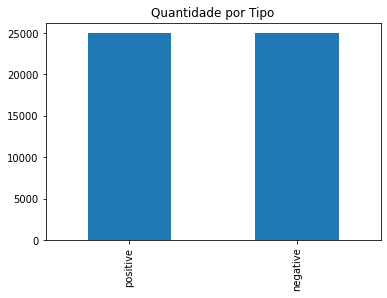

In [60]:
df["sentiment"].value_counts().plot.bar(title='Quantidade por Tipo',rot=90)

In [61]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
exemplo = df['review'].values[0]
print(exemplo)
print(len(exemplo.split()))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [63]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=0)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (40000,)
y_train shape: (40000,)
X_test shape: (10000,)
y_test shape: (10000,)


In [64]:
%%time
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
tk_X_train = tokenizer.texts_to_sequences(X_train)
tk_X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
print(X_train[0])
print(tk_X_train[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [65]:
print('Max size:', max([len(i) for i in tk_X_train]))

Max size: 2211


In [66]:
from keras.preprocessing.sequence import pad_sequences

maxlen = max([len(i) for i in tk_X_train])
tk_pad_X_train  = pad_sequences(tk_X_train, padding='post', maxlen=maxlen)
tk_pad_X_test = pad_sequences(tk_X_test, padding='post', maxlen=maxlen)
print(tk_pad_X_train[0,:])

[196  41   1 ...   0   0   0]


In [67]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

ohe_y_train = lb.fit_transform(y_train)
ohe_y_test = lb.fit_transform(y_test)
print('ohe_y_train shape:', ohe_y_train.shape)
print('ohe_y_test shape:', ohe_y_test.shape)

ohe_y_train shape: (40000, 1)
ohe_y_test shape: (10000, 1)


In [68]:
%%time
from nltk.tokenize import word_tokenize
import string
stopwords = nltk.corpus.stopwords.words('english')
punctuations = list(string.punctuation)
TAMANHO_MIMINO = 1
IGNORAR = ['...', 'br','.so','\'ll']
def prepara(texto):
    palavras = [i for i in word_tokenize(texto, language='english') if i not in punctuations]
    palavras = [i for i in palavras if i not in stopwords]
    palavras = [i for i in palavras if len(i) > TAMANHO_MIMINO]
    palavras = [i.lower() for i in palavras if i not in IGNORAR]
    return palavras
df['review2'] = df['review'].apply(prepara)
df['review2'] = df['review2'].apply(' '.join) 

CPU times: user 2min 26s, sys: 783 ms, total: 2min 27s
Wall time: 2min 44s


In [69]:
df.head()

,review,sentiment,review2
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production the filming techni...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically 's family little boy jake thinks 's ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visuall...


Depois vamos separar os dados de treino e teste:

In [70]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=0)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (40000,)
y_train shape: (40000,)
X_test shape: (10000,)
y_test shape: (10000,)


Depois vamos fazer a tokenização:

In [71]:
%%time
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
tk_X_train = tokenizer.texts_to_sequences(X_train)
tk_X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

CPU times: user 16.8 s, sys: 67.6 ms, total: 16.9 s
Wall time: 16.9 s


Em seguida, vamos considerar apenas 200 tokens e fazer o preenchimento:

In [72]:
%%time
from keras.preprocessing.sequence import pad_sequences

max_len = 200
tk_pad_X_train = pad_sequences(tk_X_train, padding='post', maxlen=max_len)
tk_pad_X_test = pad_sequences(tk_X_test, padding='post', maxlen=max_len)

CPU times: user 615 ms, sys: 24.4 ms, total: 639 ms
Wall time: 624 ms


Codificamos o Y:

In [73]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
ohe_y_train = lb.fit_transform(y_train)
ohe_y_test = lb.fit_transform(y_test)

print('ohe_y_train shape:', ohe_y_train.shape)
print('ohe_y_test shape:', ohe_y_test.shape)

ohe_y_train shape: (40000, 1)
ohe_y_test shape: (10000, 1)


Enfim, podemos utilizar LSTM; mas, primeiramente, vamos realizar os imports:

In [76]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, LSTM
from keras.optimizers import adam_v2 as Adam, nadam_v2 as Nadam
import tensorflow as tf

Em seguida, definir os hiperparâmetros:

In [77]:
NB_EPOCH = 3
BATCH_SIZE = 256
VERBOSE = 1
OPTIMIZER = Adam

Agora, vamos definir uma rede LSTM simples:

In [78]:
model = Sequential()
#model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 128)          14352256  
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,483,969
Trainable params: 14,483,969
Non-trainable params: 0
_________________________________________________________________


Habilitar o uso de GPU e fazer o treinamento:

In [79]:
%%time
history = model.fit(tk_pad_X_train, ohe_y_train,
                    epochs=NB_EPOCH,
                    verbose=1,
                    validation_data=(tk_pad_X_test, ohe_y_test),
                    batch_size=BATCH_SIZE)

Epoch 1/3
157/157 [==============================] - 266s 2s/step - loss: 0.5094 - accuracy: 0.7347 - val_loss: 0.3606 - val_accuracy: 0.8613
Epoch 2/3
157/157 [==============================] - 260s 2s/step - loss: 0.2884 - accuracy: 0.8907 - val_loss: 0.2856 - val_accuracy: 0.8831
Epoch 3/3
157/157 [==============================] - 252s 2s/step - loss: 0.2208 - accuracy: 0.9205 - val_loss: 0.2893 - val_accuracy: 0.8765
CPU times: user 20min 48s, sys: 1min 31s, total: 22min 20s
Wall time: 13min 24s


Agora, calculamos a acurácia:

In [80]:
loss, accuracy = model.evaluate(tk_pad_X_test, ohe_y_test, verbose=False)
print(f'Acurácia do Teste: {accuracy:.4f}')

Acurácia do Teste: 0.8765


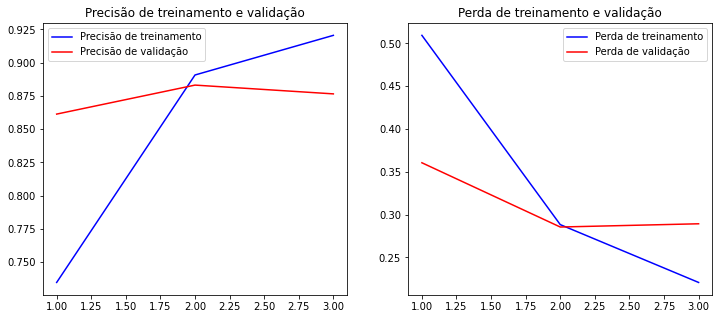

In [81]:
import matplotlib
import matplotlib.pyplot as plt

def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(acc) + 1)
  plt.figure(figsize=(12,5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'b', label='Precisão de treinamento')
  plt.plot(x, val_acc, 'r', label='Precisão de validação')
  plt.title('Precisão de treinamento e validação')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Perda de treinamento')
  plt.plot(x, val_loss, 'r', label='Perda de validação')
  plt.title('Perda de treinamento e validação')
  plt.legend()

plot_history(history)

Podemos ver que o gráfico de acurácia e de perda ficaram bem semelhantes comparando os datasets de treino e teste. Isso indica que não ocorreu overfitting. Obtivemos cerca de 0.87 de acurácia e perda próxima a 0.30.

Agora vamos fazer o mesmo treinamento sem utilização de Word Embedding.

In [82]:
NB_EPOCH = 3
BATCH_SIZE = 256
VERBOSE = 1
OPTIMIZER = Adam

In [83]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 128)          14352256  
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,483,969
Trainable params: 14,483,969
Non-trainable params: 0
_________________________________________________________________


Executamos o treinamento:

In [84]:
%%time
history = model.fit(tk_pad_X_train, ohe_y_train, epochs=NB_EPOCH,
                    verbose=1, validation_data=(tk_pad_X_test, ohe_y_test),
                    batch_size=BATCH_SIZE)

Epoch 1/3
157/157 [==============================] - 251s 2s/step - loss: 0.4796 - accuracy: 0.7496 - val_loss: 0.3353 - val_accuracy: 0.8629
Epoch 2/3
157/157 [==============================] - 249s 2s/step - loss: 0.2626 - accuracy: 0.9017 - val_loss: 0.3114 - val_accuracy: 0.8774
Epoch 3/3
157/157 [==============================] - 247s 2s/step - loss: 0.2135 - accuracy: 0.9224 - val_loss: 0.3005 - val_accuracy: 0.8807
CPU times: user 20min 47s, sys: 1min 23s, total: 22min 10s
Wall time: 13min 24s


E calculamos o resultado:

In [85]:
loss, accuracy = model.evaluate(tk_pad_X_test, ohe_y_test, verbose=False)
print(f'Acurácia do Teste: {accuracy:.4f}')

Acurácia do Teste: 0.8807


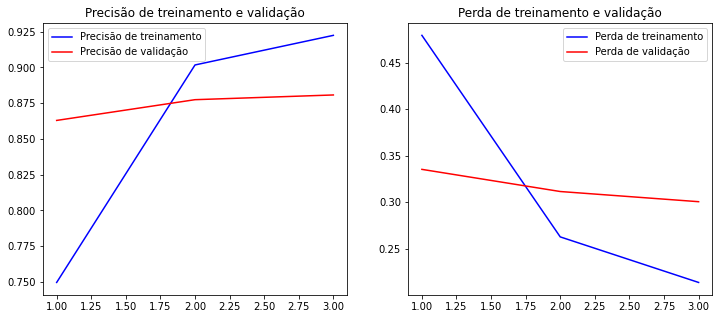

In [86]:
plot_history(history)

Veja que obtivemos um resultado um pouco melhor.

Na figura, podemos ver que obtivemos a acurácia próxima a 0.88 e a perda um pouco abaixo de 0.30. Entretanto, há indícios de overfitting, pois a linha referente aos dados de teste ficou estagnada e não apresentou melhora com o aumento das épocas.

Mesmo com overfitting, foi possível encontrar bons resultados utilizando LSTM. Podemos finalizar combinando camadas CNN (Redes Neurais Convolucionais) com células LSTM.

In [87]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, LSTM, Conv1D, MaxPooling1D
from keras.optimizers import adam_v2 as Adam, nadam_v2 as Nadam

NB_EPOCH = 3
BATCH_SIZE = 256
VERBOSE = 1
OPTMIZER = Adam

model = Sequential()
#model.add(Embedding(input_dim=vocab_size, output_dim=50, input_lenght=max_len, weights=[embedding_matrix], trainable=False))
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 200, 128)          14352256  
                                                                 
 conv1d_2 (Conv1D)           (None, 200, 32)           12320     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 100, 32)          0         
 1D)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 128)               82432     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,447,137
Trainable params: 14,447,137
Non-trainable params: 0
__________________________________________

Treinamento:

In [88]:
%%time
history = model.fit(tk_pad_X_train, ohe_y_train, epochs=NB_EPOCH, verbose=1,
                    validation_data=(tk_pad_X_test, ohe_y_test),
                    batch_size=BATCH_SIZE)

Epoch 1/3
157/157 [==============================] - 141s 884ms/step - loss: 0.4392 - accuracy: 0.7704 - val_loss: 0.2963 - val_accuracy: 0.8777
Epoch 2/3
157/157 [==============================] - 135s 860ms/step - loss: 0.2239 - accuracy: 0.9170 - val_loss: 0.2815 - val_accuracy: 0.8901
Epoch 3/3
157/157 [==============================] - 134s 854ms/step - loss: 0.1590 - accuracy: 0.9441 - val_loss: 0.3327 - val_accuracy: 0.8876
CPU times: user 11min 23s, sys: 33.4 s, total: 11min 57s
Wall time: 7min 24s


Resultados:


In [89]:
loss, accuracy = model.evaluate(tk_pad_X_test, ohe_y_test, verbose=False)
print(f'Acurácia do Teste: {accuracy:.4f}')

Acurácia do Teste: 0.8876


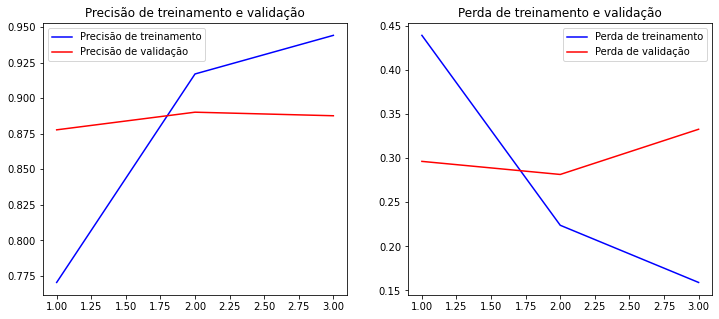

In [90]:
plot_history(history)

O resultado foi ainda melhor.

Na figura, podemos ver que obtivemos a acurácia próxima a 0.88 e a perda um pouco abaixo de 0.30. Novamente, percebe-se overfitting, pois a linha referente aos dados de teste ficou estagnada. 

Como vimos anteriormente, os dois últimos treinamentos apresentaram overfitting. Técnicas de regularização, como adição de camadas Dropout, podem ser aplicadas para melhorar o resultado.

In [91]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(LSTM(128))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 200, 128)          14352256  
                                                                 
 conv1d_3 (Conv1D)           (None, 200, 32)           12320     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 100, 32)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 100, 32)           0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               82432     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

Treinamento:

In [92]:
%%time
history = model.fit(tk_pad_X_train, ohe_y_train, epochs=NB_EPOCH, verbose=1,
                    validation_data=(tk_pad_X_test, ohe_y_test),
                    batch_size=BATCH_SIZE)

Epoch 1/3
157/157 [==============================] - 144s 900ms/step - loss: 0.4556 - accuracy: 0.7511 - val_loss: 0.2859 - val_accuracy: 0.8827
Epoch 2/3
157/157 [==============================] - 138s 881ms/step - loss: 0.2344 - accuracy: 0.9109 - val_loss: 0.2648 - val_accuracy: 0.8900
Epoch 3/3
157/157 [==============================] - 137s 874ms/step - loss: 0.1796 - accuracy: 0.9361 - val_loss: 0.2811 - val_accuracy: 0.8862
CPU times: user 11min 34s, sys: 36.9 s, total: 12min 11s
Wall time: 7min 24s


Resultado:

In [93]:
loss, accuracy = model.evaluate(tk_pad_X_test, ohe_y_test, verbose=False)
print(f'Acurácia do Teste: {accuracy:.4f}')

Acurácia do Teste: 0.8862


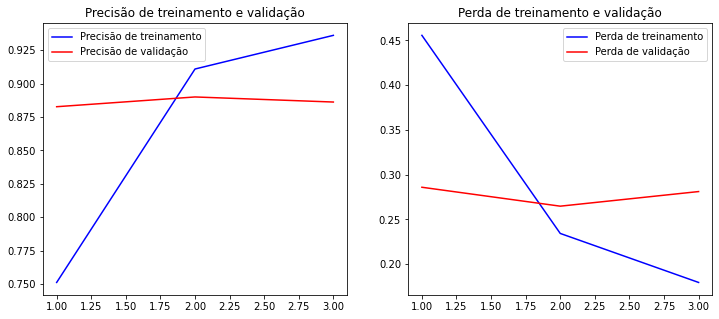

In [94]:
plot_history(history)

Como pode ser observado, conseguimos um resultado interessante após aplicação de camadas de CNN, LSTM e Dropout para nosso problema de classificação de reviews de filmes, para prever as classes positivo/negativo. Esse modelo treinado poderia ser utilizado para análise de sentimento. 